### Importing libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set



```
# This is formatted as code
```

Dataset downloaded from NSE INDIA

* Training dataset contains TCS stock price from May 2012 to March 2022

* Test dataset contains TCS stock price for April 2022

In [5]:
dataset_train= pd.read_csv('/content/drive/MyDrive/Stock_predict/TCS_stock_Train_data.csv')
training_set = dataset_train.iloc[:,1:].values

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,2-May-12,1242.1,1274.40,1242.10,1267.25,1990724
1,3-May-12,1262.7,1284.10,1258.55,1279.50,1679461
2,4-May-12,1280.0,1295.25,1263.05,1276.80,1785859
3,7-May-12,1260.0,1278.50,1248.40,1273.25,1313881
4,8-May-12,1225.0,1234.70,1195.65,1200.70,4815789


In [7]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
2445,16-Mar-22,3640.5,3668.00,3616.25,3655.90,3090475
2446,17-Mar-22,3696.6,3710.00,3660.30,3672.75,3600452
2447,21-Mar-22,3696.0,3713.95,3615.00,3626.70,2413831
2448,22-Mar-22,3640.0,3711.00,3625.00,3700.95,2907611
2449,23-Mar-22,3708.0,3729.80,3690.00,3712.40,1596195


In [7]:
dataset_train.shape

(2450, 6)

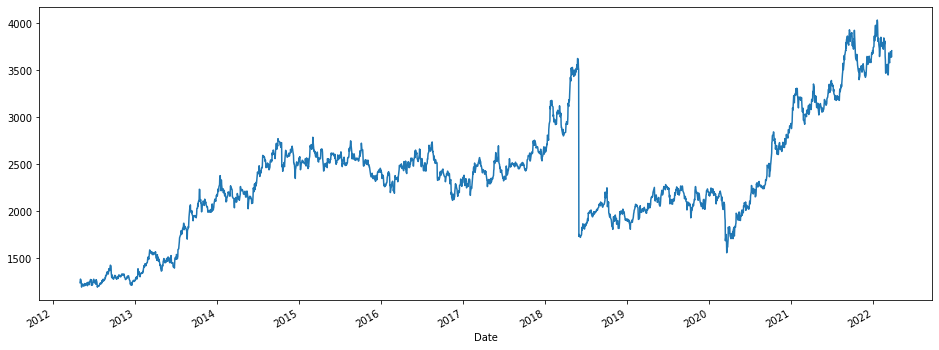

In [8]:
dataset = pd.read_csv('/content/drive/MyDrive/Stock_predict/TCS_stock_Train_data.csv',index_col="Date",parse_dates=True)
dataset['Open'].plot(figsize=(16,6))

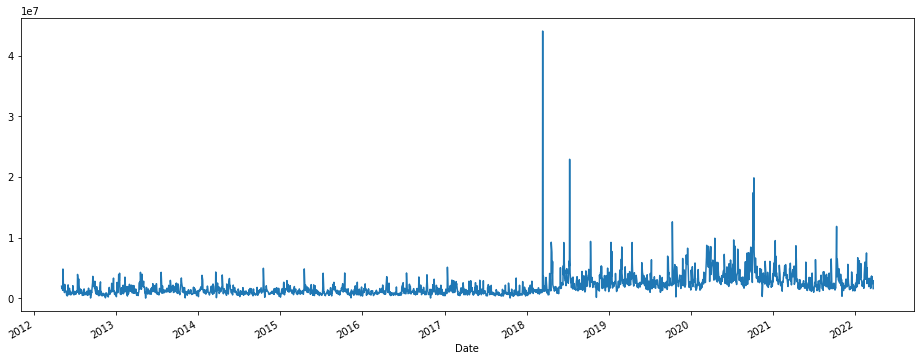

In [31]:
dataset = pd.read_csv('/content/drive/MyDrive/Stock_predict/TCS_stock_Train_data.csv',index_col="Date",parse_dates=True)
dataset['Volume'].plot(figsize=(16,6))

### Feature Scaling 

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

Timesteps = 60

60 time steps means that at each time 't' the RNN is going to look at the 60 stock prices.

Before time 't' that is the stock price is between 60 days before time 't' .

And based on the trends it is capturing during the 60 time steps will try to predict the next output. 

So 60 time steps are the past information from which our RNN is going to try to learn and understand some correlations or some trends.





In [10]:
X_train = []
y_train = []

for i in range(60,2450):
    X_train.append(training_set_scaled[i-60:i,:])
    y_train.append(training_set_scaled[i,0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape, y_train.shape

((2390, 60, 5), (2390,))

In [13]:
X_train

array([[[0.01659064, 0.02466004, 0.06396581, 0.02871261, 0.04460134],
        [0.02384684, 0.02807722, 0.06958974, 0.03303627, 0.03752808],
        [0.02994065, 0.03200521, 0.07112821, 0.0320833 , 0.03994591],
        ...,
        [0.00211346, 0.00831396, 0.04967521, 0.01311215, 0.03774741],
        [0.00457916, 0.00803213, 0.04991453, 0.01000618, 0.03235005],
        [0.00461438, 0.00502008, 0.0485812 , 0.00820612, 0.01808928]],

       [[0.02384684, 0.02807722, 0.06958974, 0.03303627, 0.03752808],
        [0.02994065, 0.03200521, 0.07112821, 0.0320833 , 0.03994591],
        [0.02289579, 0.02610442, 0.06611966, 0.03083032, 0.02922049],
        ...,
        [0.00457916, 0.00803213, 0.04991453, 0.01000618, 0.03235005],
        [0.00461438, 0.00502008, 0.0485812 , 0.00820612, 0.01808928],
        [0.00317019, 0.00443881, 0.04851282, 0.00961793, 0.0182931 ]],

       [[0.02994065, 0.03200521, 0.07112821, 0.0320833 , 0.03994591],
        [0.02289579, 0.02610442, 0.06611966, 0.03083032, 0.0

In [14]:
y_train

array([0.00317019, 0.00634037, 0.00704486, ..., 0.88095951, 0.86123391,
       0.88518642])

In [15]:
#Reshaping

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 5))
X_train.shape


(2390, 60, 5)

### Building the RNN

In [16]:
from keras.models import Sequential # Sequential Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout #to avoid overfitting

In [17]:
# since predicting a continuous value, dealing with continuous values
regressor = Sequential() 
    
#adding first LSTM and dropout to avoid overfitting
# since we are going to add another LSTM layer
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 5))) 
regressor.add(Dropout(0.2))
    
#adding second LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))
     
#adding third LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))
     
#adding fourth LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50)) 
regressor.add(Dropout(0.2))
    
#adding the output layer
regressor.add(Dense(units=1))

In [18]:
#compiling the RNN

regressor.compile(optimizer='adam', loss = 'mean_squared_error')   

In [49]:
#Fitting RNN
#100 for much higher accuracy

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
75/75 [==============================] - 7s 14ms/step - loss: 0.0183
Epoch 2/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0055
Epoch 3/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 4/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 5/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 6/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 7/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 8/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 9/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 10/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 11/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 12/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 13/100
75/75 [=====

### Making the predictions and viewing results

In [19]:
#Getting real stock price of 2022

dataset_test= pd.read_csv('/content/drive/MyDrive/Stock_predict/TCS_stock_Test_data.csv')
real_stock_price = dataset_test.iloc[:,1:].values

In [21]:
training_set

array([[1.242100e+03, 1.274400e+03, 1.242100e+03, 1.267250e+03,
        1.990724e+06],
       [1.262700e+03, 1.284100e+03, 1.258550e+03, 1.279500e+03,
        1.679461e+06],
       [1.280000e+03, 1.295250e+03, 1.263050e+03, 1.276800e+03,
        1.785859e+06],
       ...,
       [3.696000e+03, 3.713950e+03, 3.615000e+03, 3.626700e+03,
        2.413831e+06],
       [3.640000e+03, 3.711000e+03, 3.625000e+03, 3.700950e+03,
        2.907611e+06],
       [3.708000e+03, 3.729800e+03, 3.690000e+03, 3.712400e+03,
        1.596195e+06]])

In [22]:
real_stock_price

array([[3.700000e+03, 3.758200e+03, 3.695000e+03, 3.749850e+03,
        1.879046e+06],
       [3.759900e+03, 3.779500e+03, 3.672000e+03, 3.707450e+03,
        1.690133e+06],
       [3.695000e+03, 3.713000e+03, 3.661200e+03, 3.707700e+03,
        1.760990e+06],
       [3.694750e+03, 3.722000e+03, 3.691000e+03, 3.705350e+03,
        2.689063e+06],
       [3.738000e+03, 3.738000e+03, 3.706200e+03, 3.731550e+03,
        1.583455e+06],
       [3.740000e+03, 3.754650e+03, 3.720200e+03, 3.739950e+03,
        2.168110e+06],
       [3.748000e+03, 3.763000e+03, 3.728050e+03, 3.758750e+03,
        1.387014e+06],
       [3.762000e+03, 3.780000e+03, 3.737100e+03, 3.770350e+03,
        1.472994e+06],
       [3.772000e+03, 3.835600e+03, 3.772000e+03, 3.814800e+03,
        2.314947e+06],
       [3.809300e+03, 3.809300e+03, 3.731150e+03, 3.755350e+03,
        2.051729e+06],
       [3.745500e+03, 3.745500e+03, 3.679000e+03, 3.684150e+03,
        2.494829e+06],
       [3.690000e+03, 3.705000e+03, 3.64250

In [36]:
#Getting the predicted stock price of 2022

In [24]:
dataset_total = pd.concat((dataset_train,dataset_test), axis=0)


In [33]:
dataset_total.drop('Date', axis=1, inplace=True)

In [34]:
inputs = dataset_total[ len(dataset_total) - len(dataset_test) -60:].values
inputs.shape

(80, 5)

In [35]:
inputs = sc.transform(inputs)

array([[0.87215344, 0.87916579, 0.88823932, 0.885979  , 0.03422563],
       [0.88589091, 0.88797294, 0.90217094, 0.88966734, 0.03245501],
       [0.8796386 , 0.8861939 , 0.8991453 , 0.88548487, 0.03247103],
       [0.87579915, 0.89325724, 0.8974359 , 0.89926763, 0.0440503 ],
       [0.89744448, 0.90030297, 0.91497436, 0.9008912 , 0.02679489],
       [0.89998063, 0.92496301, 0.91965812, 0.92891556, 0.05267837],
       [0.92854753, 0.94580075, 0.94246154, 0.95256331, 0.05591541],
       [0.94048856, 0.93905446, 0.94270085, 0.94416306, 0.03874542],
       [0.92181969, 0.92672444, 0.92888889, 0.92528016, 0.04050115],
       [0.92463763, 0.9372578 , 0.93723077, 0.94153357, 0.05527879],
       [0.98029201, 0.97710139, 0.95931624, 0.95083385, 0.08883139],
       [0.93731837, 0.95843021, 0.95760684, 0.96355775, 0.04267845],
       [0.96162314, 0.95983936, 0.95095726, 0.94379246, 0.07216649],
       [0.95915743, 0.95772564, 0.95794872, 0.95720462, 0.15126475],
       [0.94501488, 0.9767491 , 0.

In [44]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i,:])

In [45]:
X_test= np.array(X_test)

In [40]:
type(X_test)

numpy.ndarray

In [46]:
X_test.shape

(20, 60, 5)

In [59]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 5))

In [60]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price.shape

(20, 1)

In [61]:
predicted_stock_price=np.pad(predicted_stock_price, (0,4), 'constant')

In [63]:
predicted_stock_price[:20,0].shape

(20,)

In [64]:
predicted_stock_price[:20,0]

array([0.9077219 , 0.9140407 , 0.9124985 , 0.90514576, 0.9087448 ,
       0.9161278 , 0.9187169 , 0.9216726 , 0.9256033 , 0.93708205,
       0.9294895 , 0.9106722 , 0.9042685 , 0.9074811 , 0.9074286 ,
       0.90234125, 0.86549246, 0.8459016 , 0.8552809 , 0.876356  ],
      dtype=float32)

In [65]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the Results

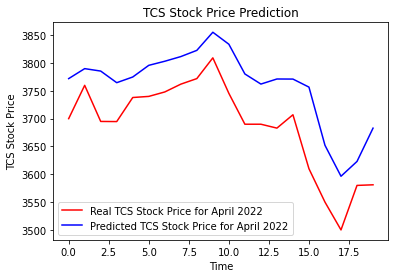

In [76]:
plt.plot(dataset_test['Open'], c='red', label='Real TCS Stock Price for April 2022')
plt.plot(predicted_stock_price[:20,0], c='blue',label='Predicted TCS Stock Price for April 2022')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

In [74]:
data = {'Real Price':dataset_test['Open'],
  'Predicted Price':predicted_stock_price[:20,0]}
df = pd.DataFrame(data)
df['Error']= df['Predicted Price'] - df['Real Price']
df['Error']= np.round(df['Error'],2)
df['% Error']= np.round((( df['Error'] /  df['Real Price'] ) * 100),2)
df

,Real Price,Predicted Price,Error,% Error
0,3700.00,3771.977051,71.98,1.95
1,3759.90,3789.915771,30.02,0.80
2,3695.00,3785.537598,90.54,2.45
3,3694.75,3764.663574,69.91,1.89
4,3738.00,3774.881104,36.88,0.99
5,3740.00,3795.841064,55.84,1.49
6,3748.00,3803.191406,55.19,1.47
7,3762.00,3811.582275,49.58,1.32
8,3772.00,3822.741455,50.74,1.35
9,3809.30,3855.329102,46.03,1.21
